<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Unlocking_Time_Series_Forecasting_with_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlocking Time Series Forecasting with Facebook Prophet

## Master easy and accurate forecasting with Python’s most intuitive time series library


| ![space-1.jpg](https://github.com/Tanu-N-Prabhu/Python/blob/master/Img/api.png?raw=true) |
|:--:|
| Image Generated Using Canva|

### Introduction
Time series forecasting is at the heart of data-driven decisions in business, finance, and tech. While traditional models like ARIMA require deep statistical knowledge, Facebook Prophet simplifies this process, making powerful forecasting accessible with just a few lines of code.

In this article, you’ll learn how to:

* Prepare time series data

* Train a model using Prophet

* Visualize and interpret the forecast

---

### What’s Covered
* Installing and importing Prophet

* Creating forecasts with minimal code

* Handling seasonality and holidays

* Plotting trends and uncertainty intervals

---

### Code Implementation

#### 1. Install and import the library



In [1]:
!pip install prophet

In [2]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Load and format the data

Prophet requires two columns: `ds` (date) and `y` (value to forecast).



In [4]:
# Sample dataset: daily temperature
data = {
    "ds": pd.date_range(start="2023-01-01", periods=100),
    "y": [20 + i*0.1 + (i%7 - 3)*2 for i in range(100)]  # simple seasonal pattern
}
df = pd.DataFrame(data)
df

,ds,y
0,2023-01-01,14.0
1,2023-01-02,16.1
2,2023-01-03,18.2
3,2023-01-04,20.3
4,2023-01-05,22.4
...,...,...
95,2023-04-06,31.5
96,2023-04-07,33.6
97,2023-04-08,35.7
98,2023-04-09,23.8


#### 3. Create and fit the model



In [5]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5oi07je7/p3cql_p_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5oi07je7/gx3w1_uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12278', 'data', 'file=/tmp/tmp5oi07je7/p3cql_p_.json', 'init=/tmp/tmp5oi07je7/gx3w1_uc.json', 'output', 'file=/tmp/tmp5oi07je7/prophet_modelac7522e4/prophet_model-20250430155125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:51:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### 4. Make future predictions



In [6]:
future = model.make_future_dataframe(periods=30)  # Forecast 30 more days
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,20.000068,13.994800,14.006040,20.000068,20.000068,-6.000021,-6.000021,-6.000021,-6.000021,-6.000021,-6.000021,0.0,0.0,0.0,14.000047
1,2023-01-02,20.099904,16.094195,16.105833,20.099904,20.099904,-3.999864,-3.999864,-3.999864,-3.999864,-3.999864,-3.999864,0.0,0.0,0.0,16.100040
2,2023-01-03,20.199739,18.194122,18.205913,20.199739,20.199739,-1.999676,-1.999676,-1.999676,-1.999676,-1.999676,-1.999676,0.0,0.0,0.0,18.200063
3,2023-01-04,20.299575,20.293906,20.305642,20.299575,20.299575,0.000177,0.000177,0.000177,0.000177,0.000177,0.000177,0.0,0.0,0.0,20.299752
4,2023-01-05,20.399768,22.393838,22.405737,20.399768,20.399768,1.999935,1.999935,1.999935,1.999935,1.999935,1.999935,0.0,0.0,0.0,22.399703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2023-05-06,32.500837,38.468557,38.536443,32.468708,32.536228,5.999721,5.999721,5.999721,5.999721,5.999721,5.999721,0.0,0.0,0.0,38.500557
126,2023-05-07,32.600861,26.568363,26.638577,32.566631,32.638232,-6.000021,-6.000021,-6.000021,-6.000021,-6.000021,-6.000021,0.0,0.0,0.0,26.600840
127,2023-05-08,32.700886,28.663252,28.741605,32.665030,32.740506,-3.999864,-3.999864,-3.999864,-3.999864,-3.999864,-3.999864,0.0,0.0,0.0,28.701022
128,2023-05-09,32.800911,30.762894,30.843328,32.764048,32.842548,-1.999676,-1.999676,-1.999676,-1.999676,-1.999676,-1.999676,0.0,0.0,0.0,30.801235


#### 5. Visualize the results


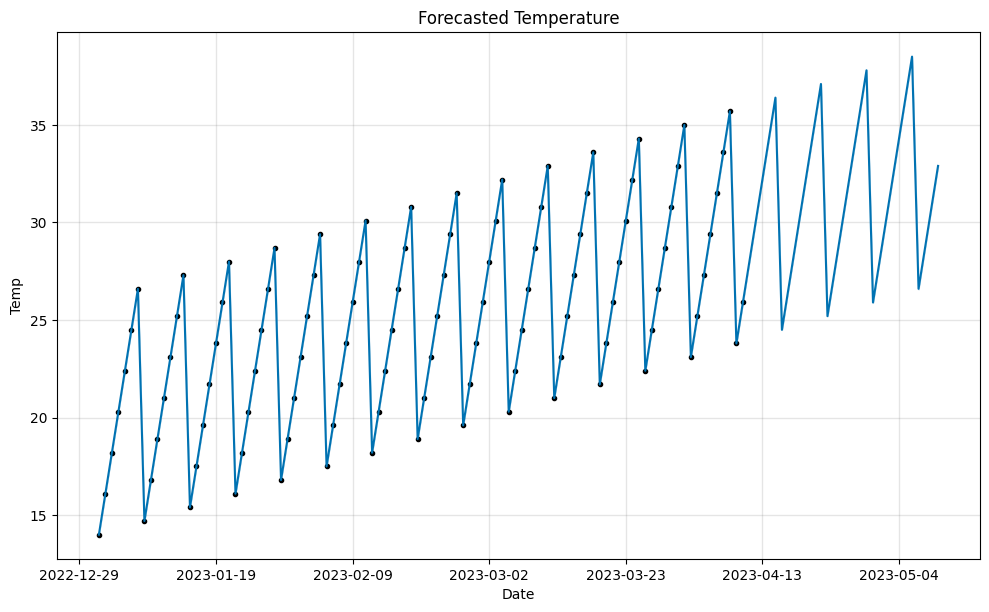

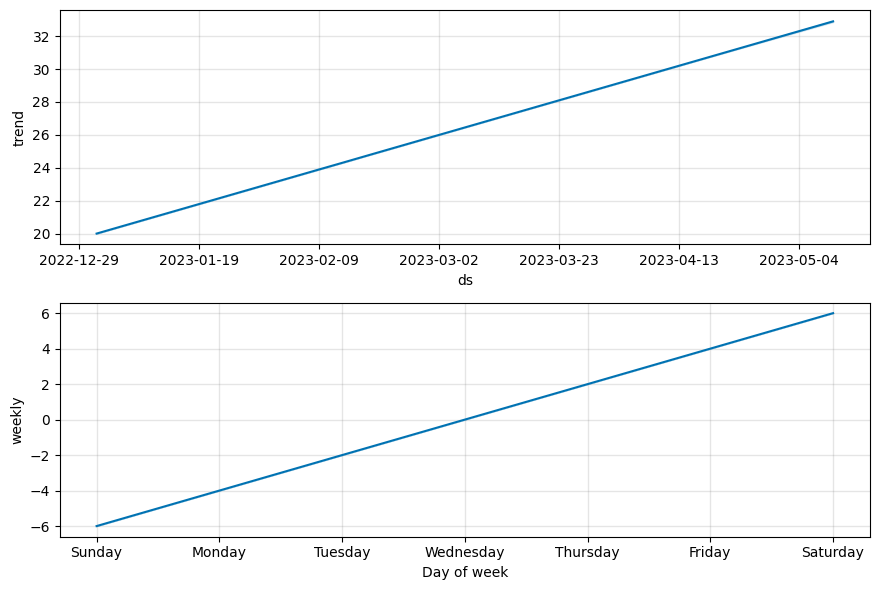

In [7]:
model.plot(forecast)
plt.title("Forecasted Temperature")
plt.xlabel("Date")
plt.ylabel("Temp")
plt.show()

model.plot_components(forecast)
plt.show()


### What You See
* A clean forecast curve with confidence intervals

* Automatic trend, seasonality, and holiday effects decomposition

---

### Why This Matters
* **Beginner-friendly**: Easy API with strong defaults

* **Scalable**: Handles large datasets and seasonal adjustments

* **Powerful**: Competes with statistical models like ARIMA


---

### Conclusion
Facebook Prophet bridges the gap between simplicity and power in time series forecasting. Whether you're predicting sales, web traffic, or temperature, this tool gives you reliable insights with minimal effort. Thanks for reading my article, let me know if you have any suggestions or similar implementations via the comment section. Until then, see you next time. Happy coding!

---

### Before you go
* Be sure to Like and Connect Me
* Follow Me : [Medium](https://medium.com/@tanunprabhu95) | [GitHub](https://github.com/Tanu-N-Prabhu) | [LinkedIn](https://ca.linkedin.com/in/tanu-nanda-prabhu-a15a091b5) | [Python Hub](https://github.com/Tanu-N-Prabhu/Python)
* [Check out my latest articles on Programming](https://medium.com/@tanunprabhu95)
* Check out my [GitHub](https://github.com/Tanu-N-Prabhu) for code and [Medium](https://medium.com/@tanunprabhu95) for deep dives!